In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("datasets\Gurgaon\Flats\properties_missing_value_imputation.csv")

In [24]:
df.shape

(3554, 18)

In [25]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [26]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [27]:
train_df.head(3)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0


In [28]:
train_df.shape

(3554, 16)

### luxury scores

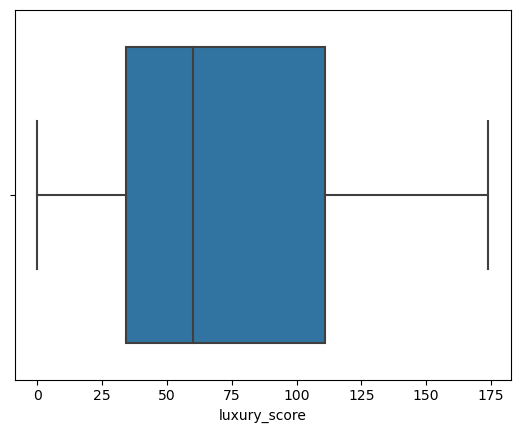

In [29]:
sns.boxplot(x=df['luxury_score'])
plt.show()

In [30]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None 

In [31]:
train_df["luxury_category"] = train_df.luxury_score.apply(categorize_luxury)

In [32]:
train_df.sample(2)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
3373,flat,sector 74,1.47,2.0,2.0,3,26.0,New Property,1348.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,Low
826,flat,sector 65,2.44,3.0,3.0,2,7.0,Under Construction,1741.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,Low


### floor number

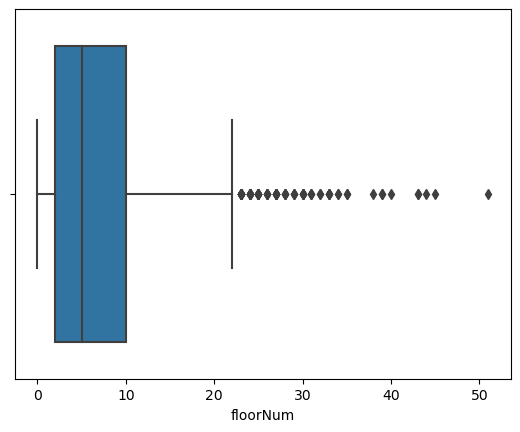

In [33]:
sns.boxplot(x=df['floorNum'])
plt.show()

In [34]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [35]:
train_df["floor_category"] = train_df.floorNum.apply(categorize_floor)

In [36]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
871,flat,sector 107,0.49,2.0,2.0,1,8.0,Relatively New,598.0,0.0,0.0,0.0,0.0,1.0,2.0,49.0,Low,Mid Floor
2140,flat,sector 106,1.14,3.0,4.0,3,8.0,Relatively New,1305.0,1.0,1.0,0.0,0.0,0.0,0.0,49.0,Low,Mid Floor
1435,flat,sohna road,0.74,2.0,2.0,3+,12.0,Relatively New,1367.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,Medium,High Floor
3156,flat,sector 70,1.80,3.0,3.0,3+,10.0,New Property,1857.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,Low,Mid Floor
2645,house,sector 4,0.70,3.0,3.0,0,1.0,Moderately Old,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor


In [37]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [38]:
train_df.shape

(3554, 16)

### input output split

In [43]:
from sklearn.preprocessing import LabelEncoder

# making copy of original data
data_label_encoded  = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# encoding the categorical columns
for col in categorical_cols:
    encoder = LabelEncoder()
    data_label_encoded[col] = encoder.fit_transform(data_label_encoded[col])

# Splitting the dataset into input and output sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [45]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0,95,2.0,2.0,2,1,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1,2
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0,99,3.0,4.0,4,3,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0,2
4,0,5,2.0,2.0,1,3,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2


In [46]:
y_label.head()

0    0.82
1    0.95
2    0.32
3    1.60
4    0.48
Name: price, dtype: float64

### Feature Selection

#### Technique 1 - Correlation Analysis

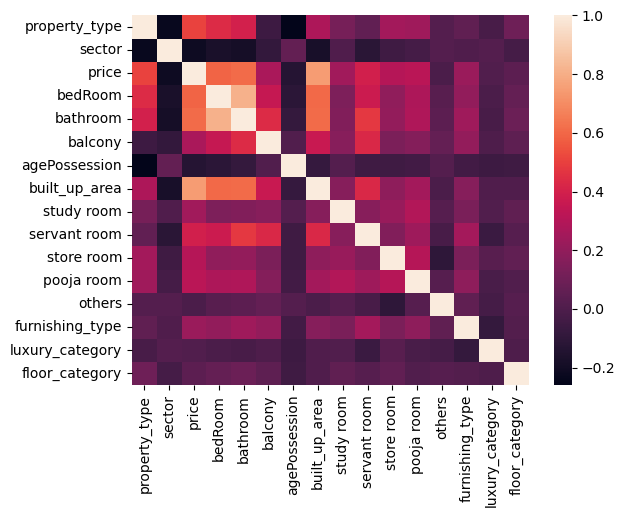

In [47]:
sns.heatmap(data_label_encoded.corr())
plt.show()

In [57]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1.sort_values("corr_coeff", ascending=False)

,feature,corr_coeff
1,price,1.000000
6,built_up_area,0.744368
3,bathroom,0.609777
2,bedRoom,0.591289
8,servant room,0.391930
10,pooja room,0.319852
9,store room,0.305677
4,balcony,0.269637
7,study room,0.242955
12,furnishing_type,0.225625


#### Technique 2 - Random Forest Feature Importancee

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_label,y_label)

RandomForestRegressor(random_state=42)

In [56]:
# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_model.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.640045
0,property_type,0.109010
1,sector,0.102154
3,bathroom,0.026212
2,bedRoom,0.024704
8,servant room,0.019259
5,agePossession,0.014079
4,balcony,0.013101
12,furnishing_type,0.010714
7,study room,0.009026


#### Technique 3 - Gradient Boosting Feature importances

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

GradientBoostingRegressor()

In [59]:
# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.670395
1,sector,0.103163
0,property_type,0.102583
2,bedRoom,0.040487
3,bathroom,0.032984
8,servant room,0.024628
9,store room,0.008227
5,agePossession,0.004599
12,furnishing_type,0.003806
10,pooja room,0.003302


#### Technique 4 - Permutation Importance

In [60]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

RandomForestRegressor(random_state=42)

In [61]:
# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.717320
0,property_type,0.223860
1,sector,0.179028
3,bathroom,0.023048
8,servant room,0.020168
2,bedRoom,0.017554
5,agePossession,0.006554
13,luxury_category,0.003152
9,store room,0.001372
14,floor_category,0.000970


#### Technique 5 - LASSO

In [63]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.504657
0,property_type,0.730339
3,bathroom,0.271509
9,store room,0.201689
7,study room,0.173334
12,furnishing_type,0.170144
8,servant room,0.157606
10,pooja room,0.074766
13,luxury_category,0.052219
2,bedRoom,0.014769


#### Technique 6 - RFE

In [64]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.639828
0,property_type,0.111885
1,sector,0.099445
3,bathroom,0.026733
2,bedRoom,0.026477
8,servant room,0.021083
5,agePossession,0.014038
4,balcony,0.012429
12,furnishing_type,0.009987
7,study room,0.008017


#### Technique 7 - Linear Regression Weights

In [66]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.507467
0,property_type,0.729655
3,bathroom,0.278054
9,store room,0.206096
7,study room,0.181358
12,furnishing_type,0.179312
8,servant room,0.166686
10,pooja room,0.077872
13,luxury_category,0.063509
2,bedRoom,0.017436


In [68]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.88830244e-01,  1.59250496e-01, -4.02335615e-02, ...,
        -1.07746998e-02, -4.48093783e-03, -3.62343816e-03],
       [-2.05208113e-01, -4.29106801e-01, -5.26711254e-02, ...,
        -9.93829058e-03, -3.91076876e-03, -1.08759111e-03],
       [-1.79596831e-01, -4.36006002e-01, -5.01000916e-02, ...,
        -1.21023338e-02, -1.25270373e-02, -1.01908196e-02],
       ...,
       [-1.87658588e-01,  6.86596667e-02, -8.06097272e-03, ...,
         7.80484739e-03,  1.09621571e-02, -2.02227110e-03],
       [ 1.47506861e+00,  1.02108780e+00,  3.66291820e-01, ...,
         1.50063890e-01,  6.16066911e-02,  2.81291075e-02],
       [-3.07827689e-01,  6.41072779e-02, -2.22034339e-02, ...,
         9.55556176e-03, -1.11815219e-02,  2.74444926e-02]])

In [69]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.237681
0,property_type,0.487944
1,sector,0.391045
3,bathroom,0.128968
8,servant room,0.088849
2,bedRoom,0.054923
4,balcony,0.039167
5,agePossession,0.027293
12,furnishing_type,0.027198
14,floor_category,0.021242


#### Final exploration

In [70]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [71]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.212084,0.102154,0.103163,0.179028,-0.068819,0.099445,-0.077813,0.391045
bedRoom,0.591289,0.024704,0.040487,0.017554,0.014769,0.026477,0.017436,0.054923
bathroom,0.609777,0.026212,0.032984,0.023048,0.271509,0.026733,0.278054,0.128968
balcony,0.269637,0.013101,0.001847,0.000092,-0.046320,0.012429,-0.069207,0.039167
agePossession,-0.134171,0.014079,0.004599,0.006554,-0.000000,0.014038,-0.000598,0.027293
built_up_area,0.744368,0.640045,0.670395,0.717320,1.504657,0.639828,1.507467,1.237681
study room,0.242955,0.009026,0.002806,-0.016785,0.173334,0.008017,0.181358,0.019668
servant room,0.391930,0.019259,0.024628,0.020168,0.157606,0.021083,0.166686,0.088849
store room,0.305677,0.008731,0.008227,0.001372,0.201689,0.007851,0.206096,0.017609


In [72]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [73]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.707897
sector             0.143745
bathroom           0.036488
bedRoom            0.029513
servant room       0.027343
agePossession      0.011350
balcony            0.009918
store room         0.007537
furnishing_type    0.005996
luxury_category    0.005983
floor_category     0.005297
pooja room         0.004135
study room         0.002775
others             0.002021
dtype: float64

In [74]:
# columns to drop study room, pooja room, others

In [75]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [76]:
scores.mean()

0.819436397978102

In [77]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [78]:
scores.mean()

0.8180086007232305

In [79]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [80]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


In [82]:
export_df.to_csv('datasets\Gurgaon\Flats\properties_post_feature_selection.csv', index=False)